# **Data Scientist - IDX Partners - Qonita Aulia Himmah**

**Goals**
Tujuannya adalah untuk mengembangkan model pembelajaran mesin yang dapat memprediksi risiko kredit berdasarkan dataset yang disediakan, termasuk data pinjaman yang disetujui dan ditolak. Dalam mengembangkan model juga perlu melakukan beberapa tahapan yang dimulai dengan `Data Understanding`, `Exploratory Data Analysis (EDA)`,`Data Preparation`,`Pemodelan Data` dan `Evaluasi`

## **Import Library**

In [184]:
import itertools
import joblib
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set();

In [185]:
!pip install dython

In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from dython.nominal import associations

# **Exploratory Data Analysis (EDA) 🔎**

In [187]:
data = pd.read_csv("/kaggle/input/loandata/loan_data_2007_2014.csv")

# Menampilkan 5 baris pertama dari data
data.head()

/tmp/ipykernel_34/1209388166.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/kaggle/input/loandata/loan_data_2007_2014.csv")


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
# Menampilkan ukuran baris dan kolom pada data
data.shape

(466285, 75)

In [189]:
# Deskripsi mengenai feature pada data
data_dict = pd.read_excel("/kaggle/input/datadictionary/LCDataDictionary.xlsx", sheet_name="LoanStats")
data_dict = data_dict[["Feature", "Description"]]
data_dict = data_dict.iloc[:78]
data_dict

,Feature,Description
0,_rec,The total amount committed by investors for th...
1,acc_now_delinq,The number of accounts on which the borrower i...
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
73,total_rec_prncp,Principal received to date
74,total_rev_hi_lim,Total revolving high credit/credit limit
75,url,URL for the LC page with listing data.
76,verified_status_joint,Indicates if the co-borrowers' joint income wa...


In [190]:
# Statistik deskriptif untuk kolom numerik
data.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


In [191]:
# Menampilkan informasi umum tentang data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [192]:
def count_columns_by_dtype(df):
    # Fungsi ini akan menghitung jumlah kolom dengan jenis data yang sama dalam sebuah dataframe.
    dtype_count = df.dtypes.value_counts().to_dict()
    return dtype_count

dtype_count = count_columns_by_dtype(data)
print(dtype_count)

{dtype('float64'): 46, dtype('O'): 22, dtype('int64'): 7}


## **Menentukan Status Pinjaman**
Menentukan dan mengelompokkan pinjaman mana yang berkemungkinan untuk diterima ataupun ditolak.
Sehingga kategori yang bisa kita ambil diantaranya :
- Disetujui : Fully Paid
- Ditolak : Charged Off, Default, dan Does not meet the credit policy

Kita tidak bisa menggunakan `current` karena pinjaman tersebut masih berlangsung, begitu pula dengan `late` dan `in_grace_period`.

In [193]:
# Mendefinisikan gaya font untuk judul
title_font = dict(size=20, weight="bold")

# Fungsi untuk plot distribusi hitungan dari sebuah variabel
def plot_count(df, y, title, **sns_kwargs):
    # Menghitung nilai hitungan dan persentase
    value_counts = df[y].value_counts()
    percentage = value_counts / value_counts.sum()
    percentage = percentage.apply("{:.2%}".format)

    # Membuat gambar (figure) dan mengatur judul
    fig, ax = plt.subplots(figsize=(14, 10))
    ax.set_title(title, fontdict=title_font)

    # Melakukan plot countplot menggunakan seaborn
    sns.countplot(data=df, y=y, order=value_counts.index, ax=ax, **sns_kwargs)
    ax.set_ylabel("")

    # Menampilkan distribusi persentase sebagai teks pada setiap bar
    for i, count in enumerate(value_counts):
        ax.text(count+100, i, f"{percentage[i]}", va='center')

    plt.show()

# Fungsi untuk plot distribusi dari sebuah variabel
def plot_distribution(df, x, title, **sns_kwargs):
    # Membuat gambar (figure) dan mengatur judul
    plt.figure(figsize=(14, 10))
    plt.title(title, fontdict=title_font)

    # Melakukan plot histogram menggunakan seaborn
    sns.histplot(data=df, x=x, kde=True, **sns_kwargs)
    plt.ylabel("")
    plt.show()

# Fungsi untuk plot boxplot dari dua variabel
def plot_boxplot(df, x, y, title, **sns_kwargs):
    # Membuat gambar (figure) dan mengatur judul
    plt.figure(figsize=(14, 10))
    plt.title(title, fontdict=title_font)

    # Melakukan plot boxplot menggunakan seaborn
    sns.boxplot(data=df, x=x, y=y, **sns_kwargs)
    plt.ylabel("")
    plt.show()

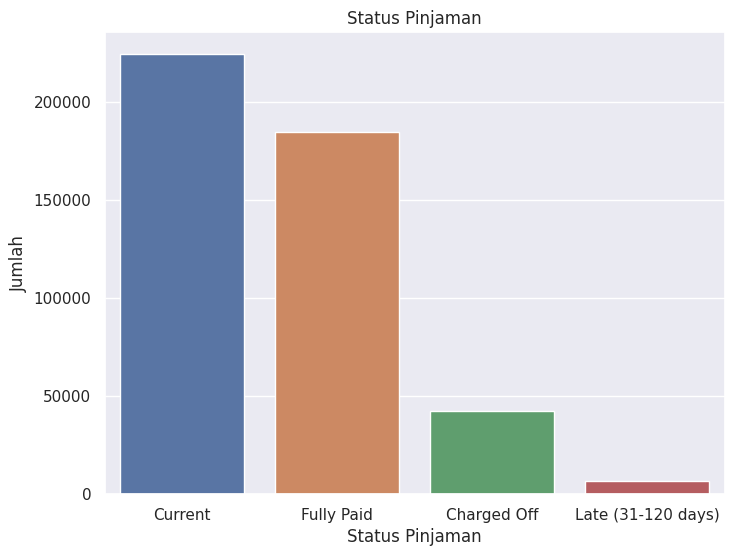

In [194]:
# Plot count untuk variabel "loan_status"
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="loan_status", order=data["loan_status"].value_counts().index[:4])
plt.title("Status Pinjaman")
plt.xlabel("Status Pinjaman")
plt.ylabel("Jumlah")
plt.show()

/tmp/ipykernel_34/2256680672.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(count+100, i, f"{percentage[i]}", va='center')


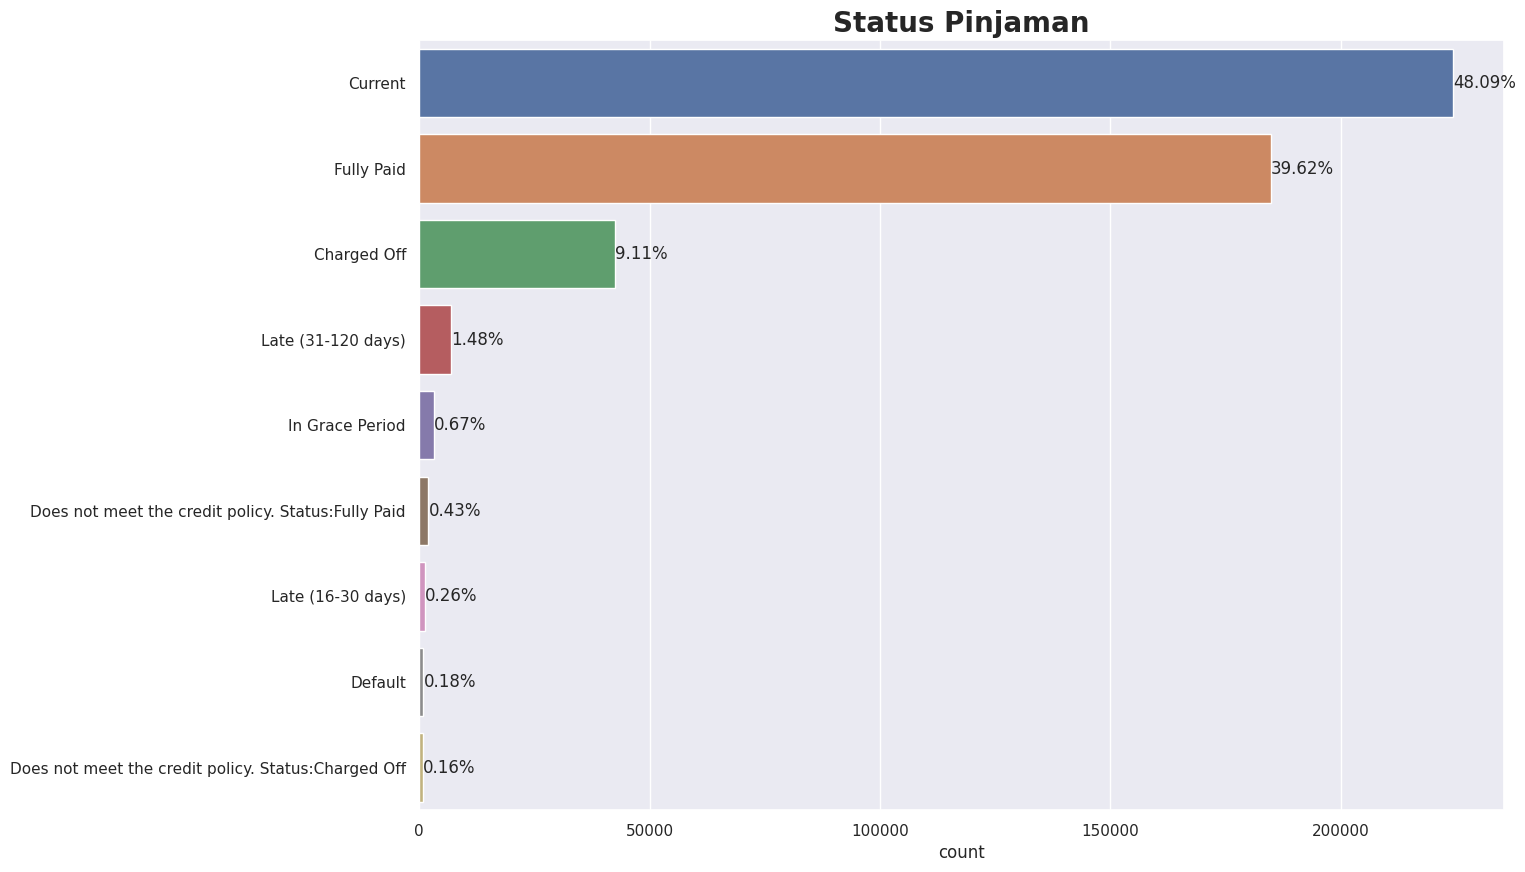

In [195]:
# Melakukan plot count untuk variabel "loan_status" dalam dataframe "data" dengan judul "Status Pinjaman"
plot_count(data, title="Status Pinjaman",  y="loan_status")

*  "Current" memiliki persentase sebesar 48.09%, yang menunjukkan bahwa sebagian besar pinjaman sedang berjalan (tidak ada keterlambatan pembayaran).
*  "Fully Paid" memiliki persentase sebesar 39.62%, yang menunjukkan bahwa sebagian besar pinjaman telah sepenuhnya dilunasi.
*  "Charged Off" memiliki persentase sebesar 9.11%, yang menunjukkan bahwa sebagian kecil pinjaman telah dinyatakan tidak bisa dipungut lagi.
*  "Late (31-120 days)" memiliki persentase sebesar 1.48%, yang menunjukkan adanya keterlambatan pembayaran selama 31-120 hari.
*  "In Grace Period" memiliki persentase sebesar 0.67%, yang menunjukkan adanya masa toleransi pembayaran.
*  "Does not meet the credit policy. Status:Fully Paid" memiliki persentase sebesar 0.43%, yang menunjukkan bahwa sebagian kecil pinjaman tidak memenuhi kebijakan kredit namun telah dilunasi sepenuhnya.
*  "Late (16-30 days)" memiliki persentase sebesar 0.26%, yang menunjukkan adanya keterlambatan pembayaran selama 16-30 hari.
*  "Default" memiliki persentase sebesar 0.18%, yang menunjukkan adanya kegagalan pembayaran.
*  "Does not meet the credit policy. Status:Charged Off" memiliki persentase sebesar 0.16%, yang menunjukkan bahwa sebagian kecil pinjaman tidak memenuhi kebijakan kredit dan dinyatakan tidak bisa dipungut lagi.

In [196]:
# Tentukan kategori yang akan digunakan
approved_cat = ["Fully Paid"]
dissaproved_cat = [
    "Charged Off",
    "Default",
    "Does not meet the credit policy. Status:Fully Paid",
    "Does not meet the credit policy. Status:Charged Off"
]

In [197]:
# Ganti dengan label baru
def label_loan_status(value):
    if value in approved_cat:
        return 1
    return 0

In [198]:
# Menyaring dan terapkan fungsi
inter_df = data[data["loan_status"].isin(approved_cat + dissaproved_cat)].copy()
inter_df["loan_status"] = inter_df["loan_status"].apply(label_loan_status)

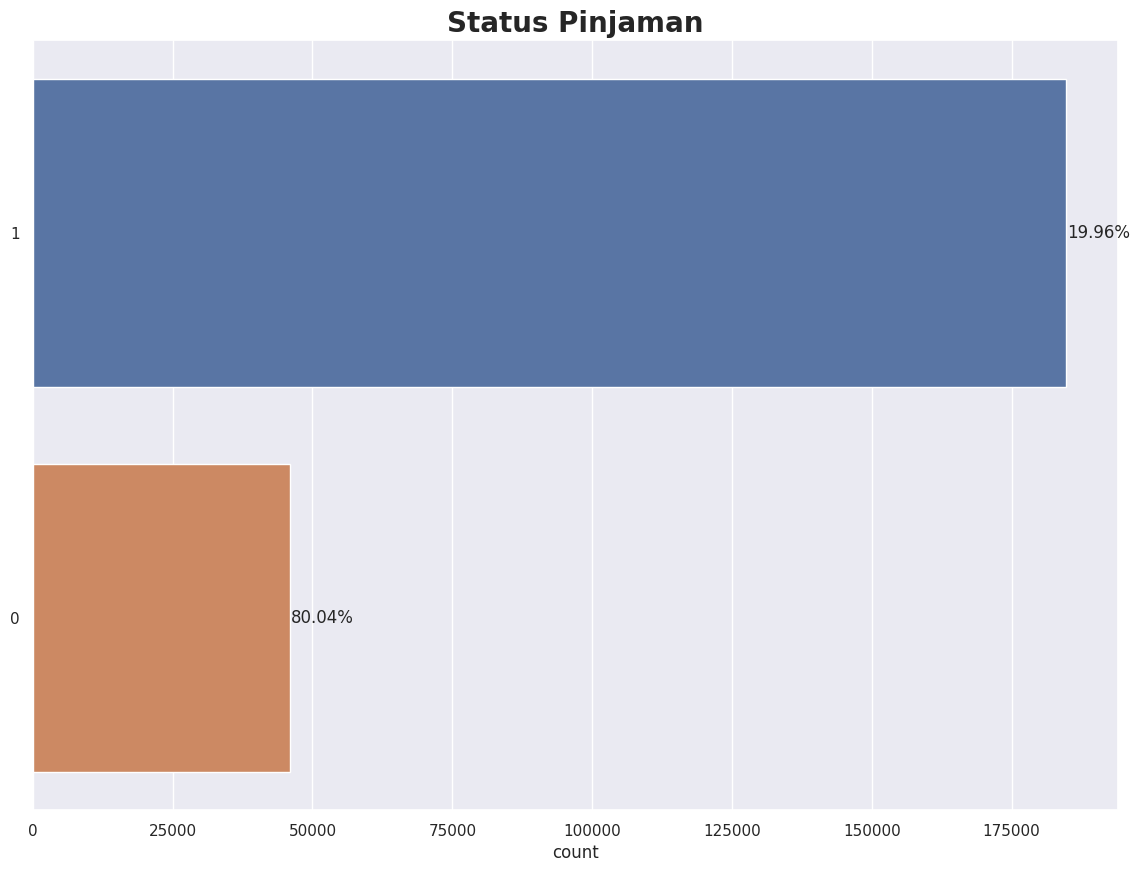

In [199]:
# Menampilkan visualisasi dengan judul "Status Pinjaman"
plot_count(inter_df, y="loan_status", title="Status Pinjaman")

Dapat dilihat dari hasil visualisasi menyatakan bahwa status pinjaman yang diterima lebih besar dari pada yang ditolak yaitu dengan perbandingan 80.04% dan 19.96%.

## **Status Pinjaman dan Besar Pinjaman Pokok yang Sudah Dibayarkan**
Principal adalah besar pinjaman pokok yang dipinjamkan kepada debitur. Dengan kata lain merupakan jumlah asli dari uang yang dipinjamkan. Orang yang mengalami gagal bayar kebanyakan belum dapat membayarkan uang pokok pembayaran hingga jatuh tempo, bisa dilihat dari distribusi pembayaran dibawah. Rata-ratanya hampir mencapai 0.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


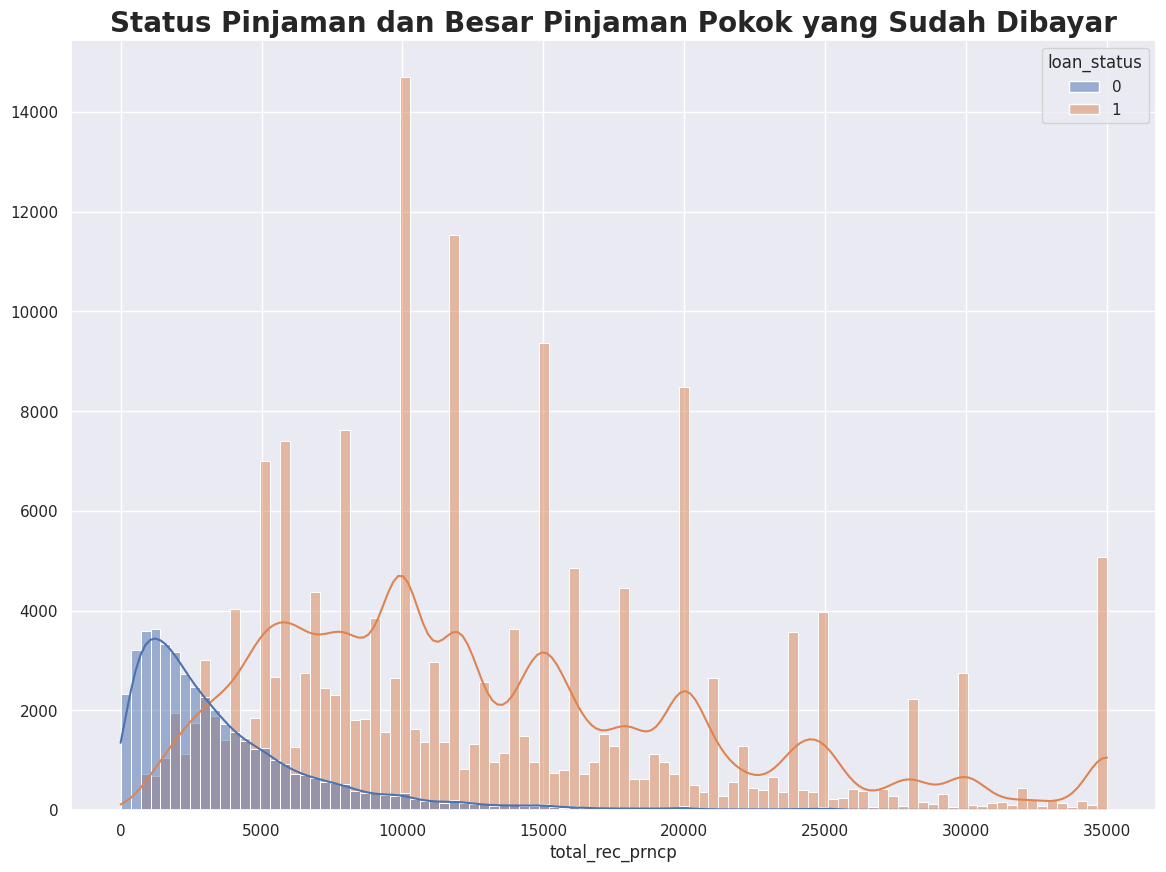

In [200]:
plot_distribution(df=inter_df, x="total_rec_prncp", hue="loan_status", title="Status Pinjaman dan Besar Pinjaman Pokok yang Sudah Dibayar")

## **Status Pinjaman dan Total Uang yang Tidak Ditagihkan**
Charged off recoveries adalah total uang yang tidak bisa dibayarkan kepada perusahaan peminjam karena sudah lewat masa jatuh tempo sehingga perusahaan peminjam bisa melepas hak tagih utang tersebut dengan menjualnya ke perusahaan lain. Dari sini terlihat jelas bahwa orang dengan status pinjaman buruk lah yang paling banyak memiliki charge off recoveries.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


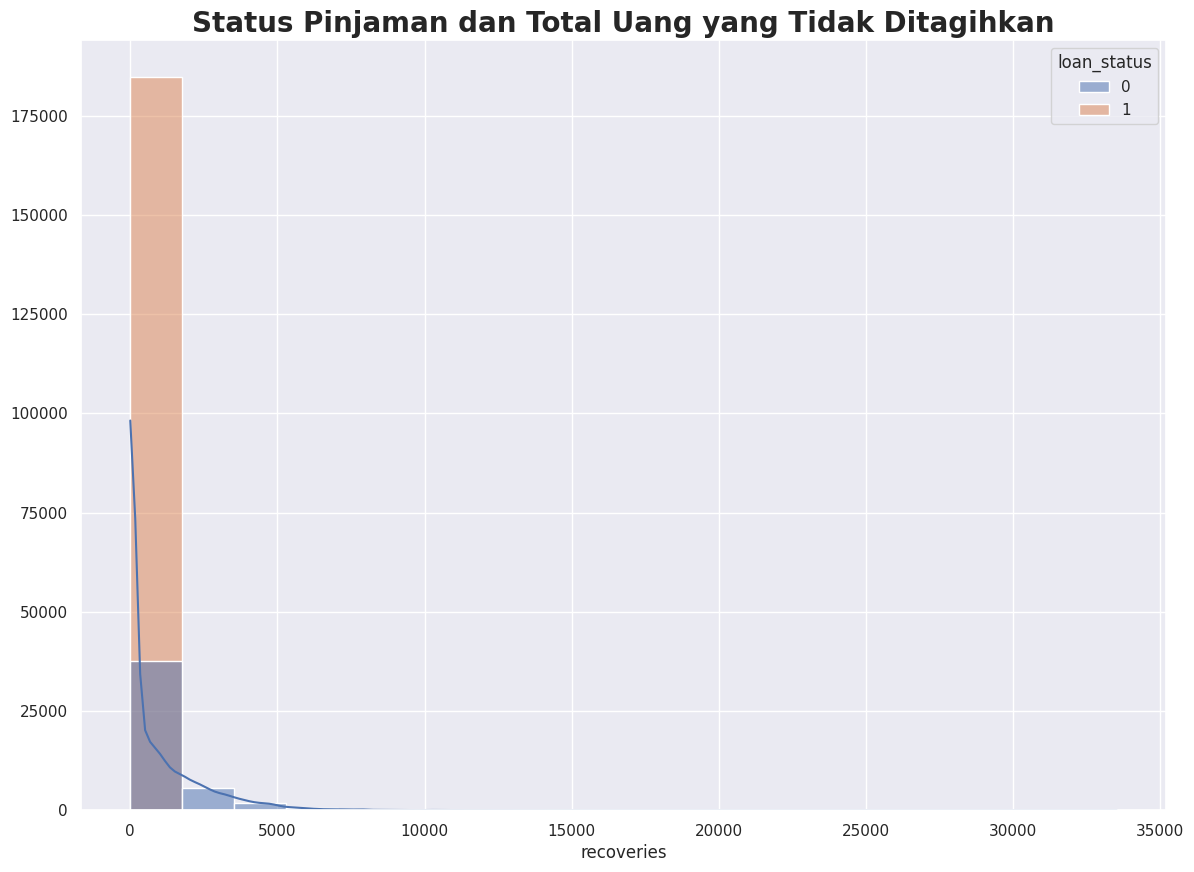

In [201]:
plot_distribution(df=inter_df, x="recoveries", hue="loan_status", title="Status Pinjaman dan Total Uang yang Tidak Ditagihkan")

## **Status Pinjaman dan Jumlah Pinjaman**
Rata-rata jumlah pinjaman terbanyak berada pada status `buruk`.

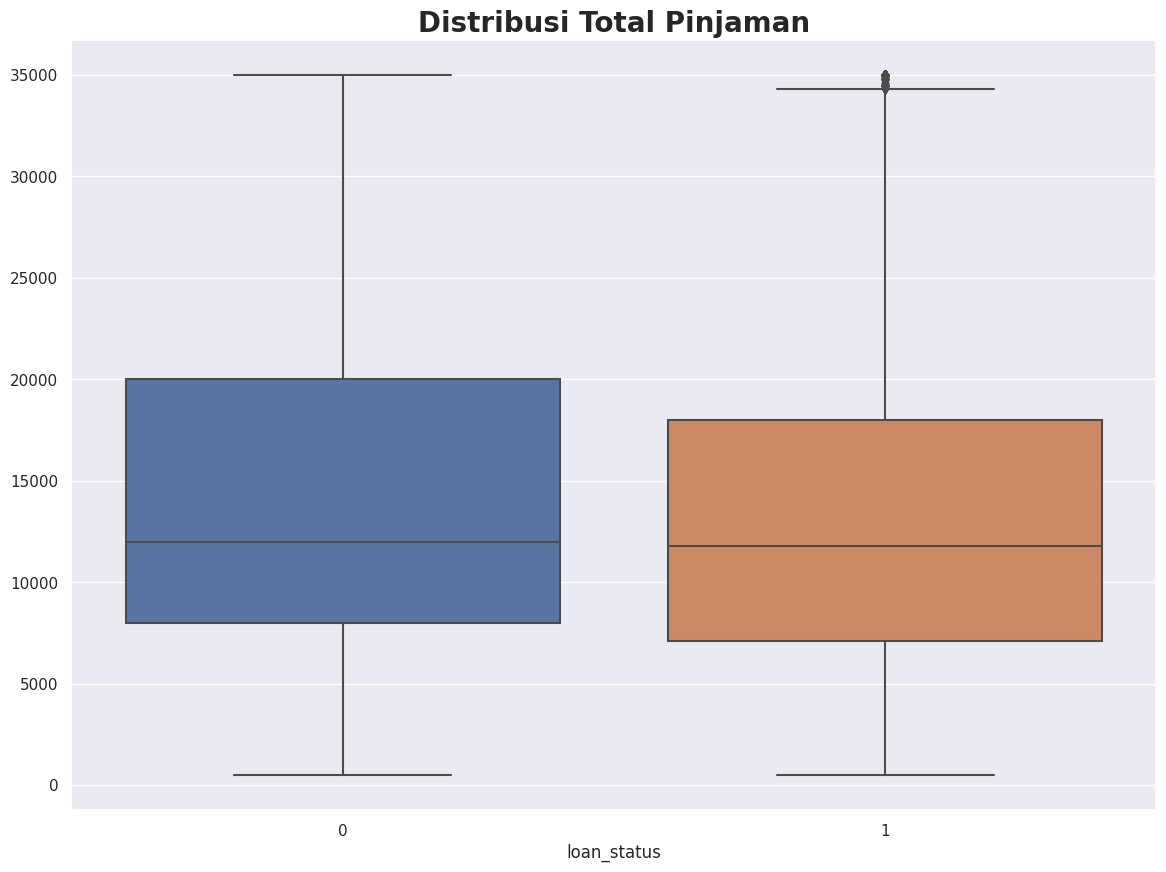

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,46056.0,14205.570393,8362.468087,500.0,8000.0,12000.0,20000.0,35000.0
1,184739.0,13214.394226,7949.030252,500.0,7125.0,11800.0,18000.0,35000.0


In [202]:
x, y = "loan_status", "loan_amnt"
plot_boxplot(df=inter_df, x=x, y=y, title="Distribusi Total Pinjaman")
inter_df.groupby(x)[y].describe()

## **Status Pinjaman dan Total Pembayaran yang Diterima**
Tampak jelas apabila total pembayaran terbanyak berada pada pinjaman yang berstatus `baik`.

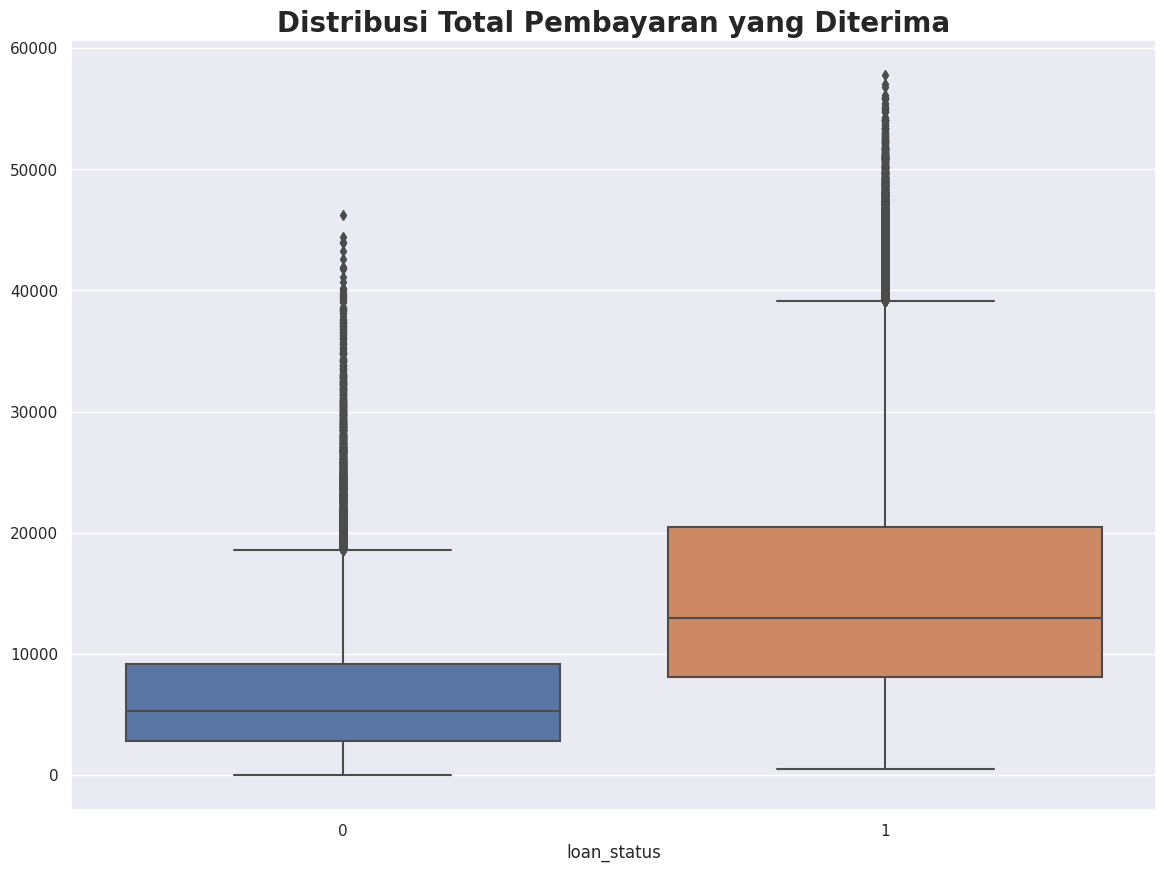

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,46056.0,6814.461231,5610.294962,0.00,2829.912500,5260.94000,9120.685,46199.44000
1,184739.0,15209.872007,9459.142043,526.33,8092.460697,12979.34106,20491.905,57777.57987


In [203]:
x, y = "loan_status", "total_pymnt"
plot_boxplot(df=inter_df, x=x, y=y, title="Distribusi Total Pembayaran yang Diterima")
inter_df.groupby(x)[y].describe()

## **Tujuan Mengambil Pinjaman**
Lebih dari setengah peminjam memiliki tujuan untuk menutup pinjaman sebelumnya. Apabila dilihat dari jenisnya, tujuan untuk konsumsi lebih banyak daripada tujuan untuk bisnis, renovasi dan pendidikan.

/tmp/ipykernel_34/2256680672.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(count+100, i, f"{percentage[i]}", va='center')


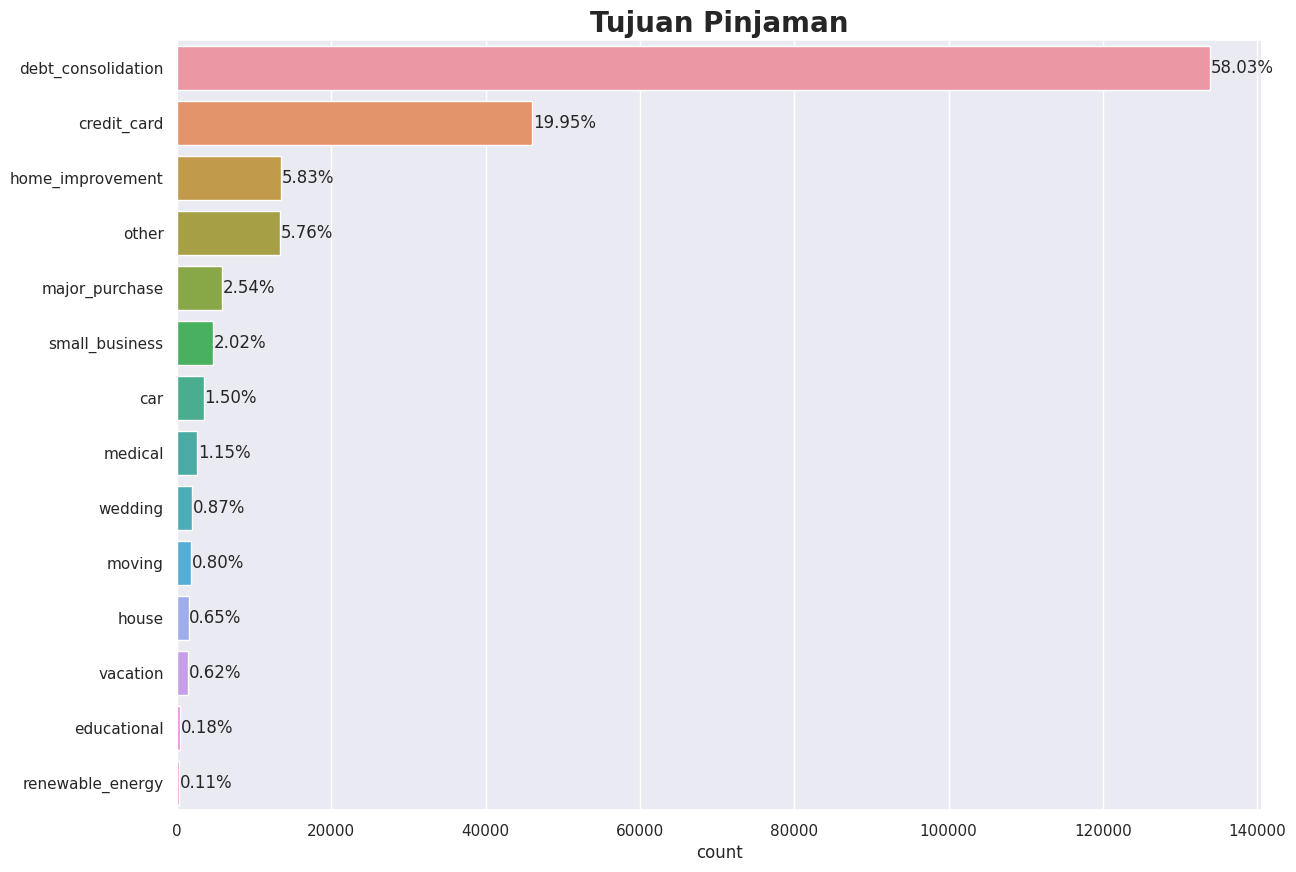

In [204]:
plot_count(inter_df, y="purpose", title="Tujuan Pinjaman")

## **Negara Asal Peminjam**
Peminjam sebagian besar berasal dari negara Kanada.


/tmp/ipykernel_34/2256680672.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(count+100, i, f"{percentage[i]}", va='center')


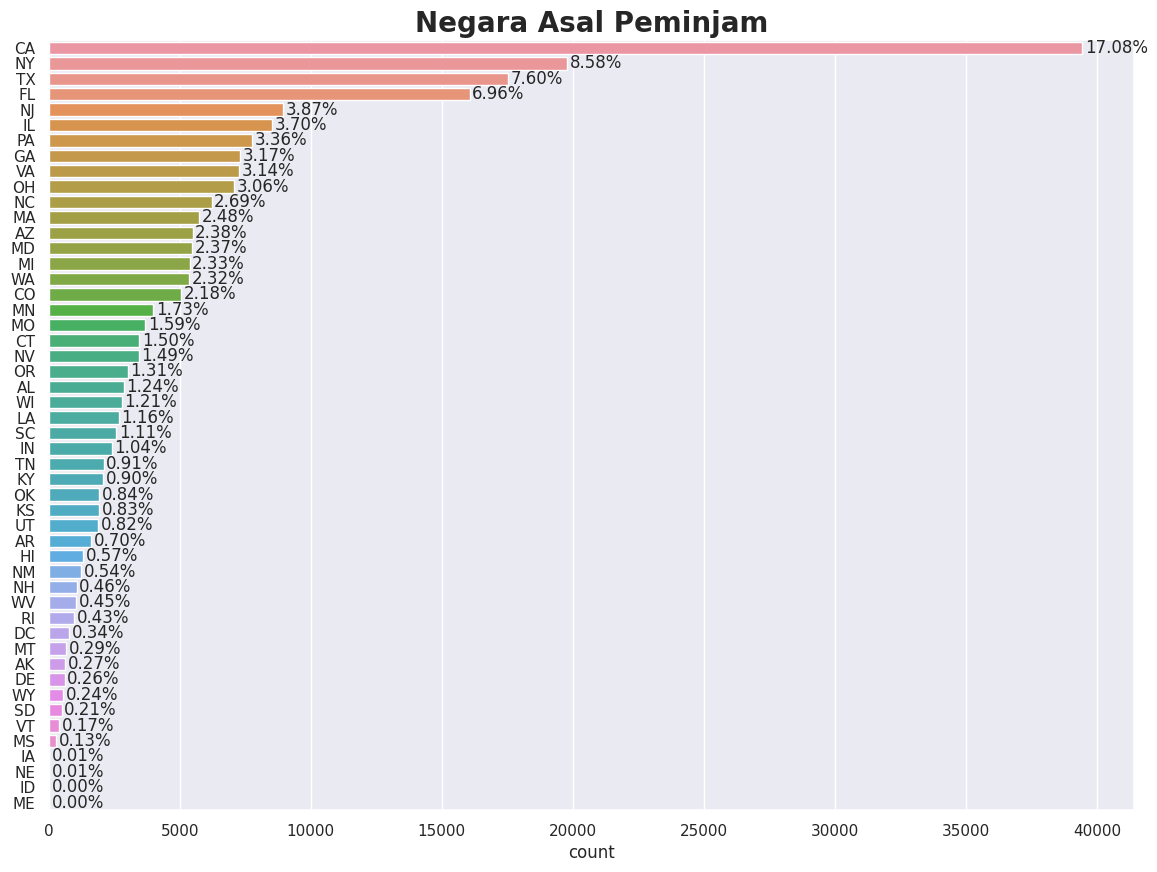

In [205]:
plot_count(df=inter_df, y="addr_state", title="Negara Asal Peminjam")

## **Tingkat Pinjaman**
Pinjaman diberi tingkatan dari huruf abjad A sampai G, semakin mendekati G maka tingkat bunga yang dibayarkan lebih besar.

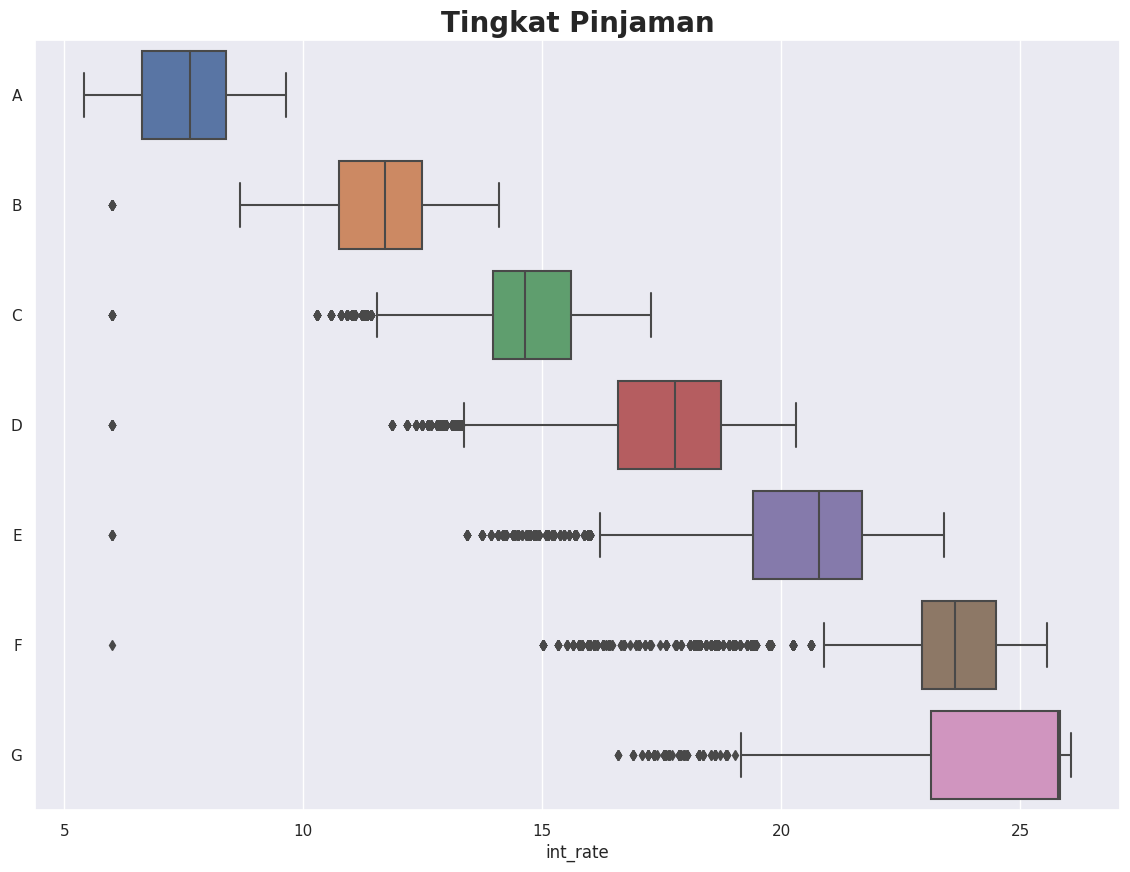

/tmp/ipykernel_34/2256680672.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(count+100, i, f"{percentage[i]}", va='center')


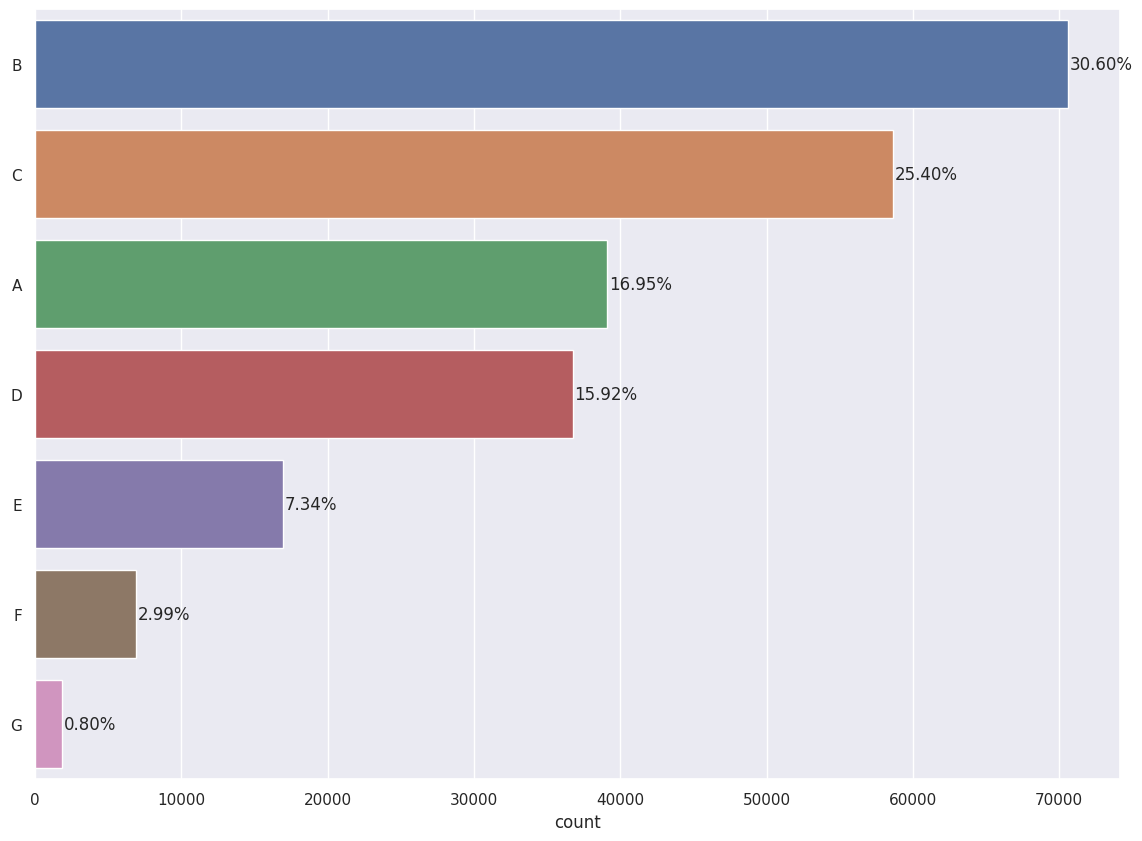

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,39110.0,7.545742,1.003571,5.42,6.62,7.62,8.39,9.63
B,70622.0,11.654616,1.281087,6.00,10.74,11.71,12.49,14.09
C,58626.0,14.767515,1.233598,6.00,13.98,14.64,15.61,17.27
D,36740.0,17.628885,1.484771,6.00,16.59,17.77,18.75,20.31
E,16945.0,20.341001,1.920465,6.00,19.42,20.80,21.70,23.40
F,6896.0,23.137195,2.097052,6.00,22.95,23.63,24.50,25.57
G,1856.0,24.191482,2.509841,16.59,23.13,25.80,25.83,26.06


In [206]:
x, y = "int_rate", "grade"
order = inter_df[y].sort_values().unique()
plot_boxplot(inter_df, x=x, y=y, title="Tingkat Pinjaman", order=order)
plot_count(df=inter_df, y=y, title="")
inter_df.groupby(y)[x].describe()

## **Status Kepemilikan Rumah**
Sebagian besar peminjam mendelegasikan rumahnya sebagai jaminan pinjaman, sedangkan hanya sedikit dari peminjam yang memiliki rumah sendiri.

/tmp/ipykernel_34/2256680672.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(count+100, i, f"{percentage[i]}", va='center')


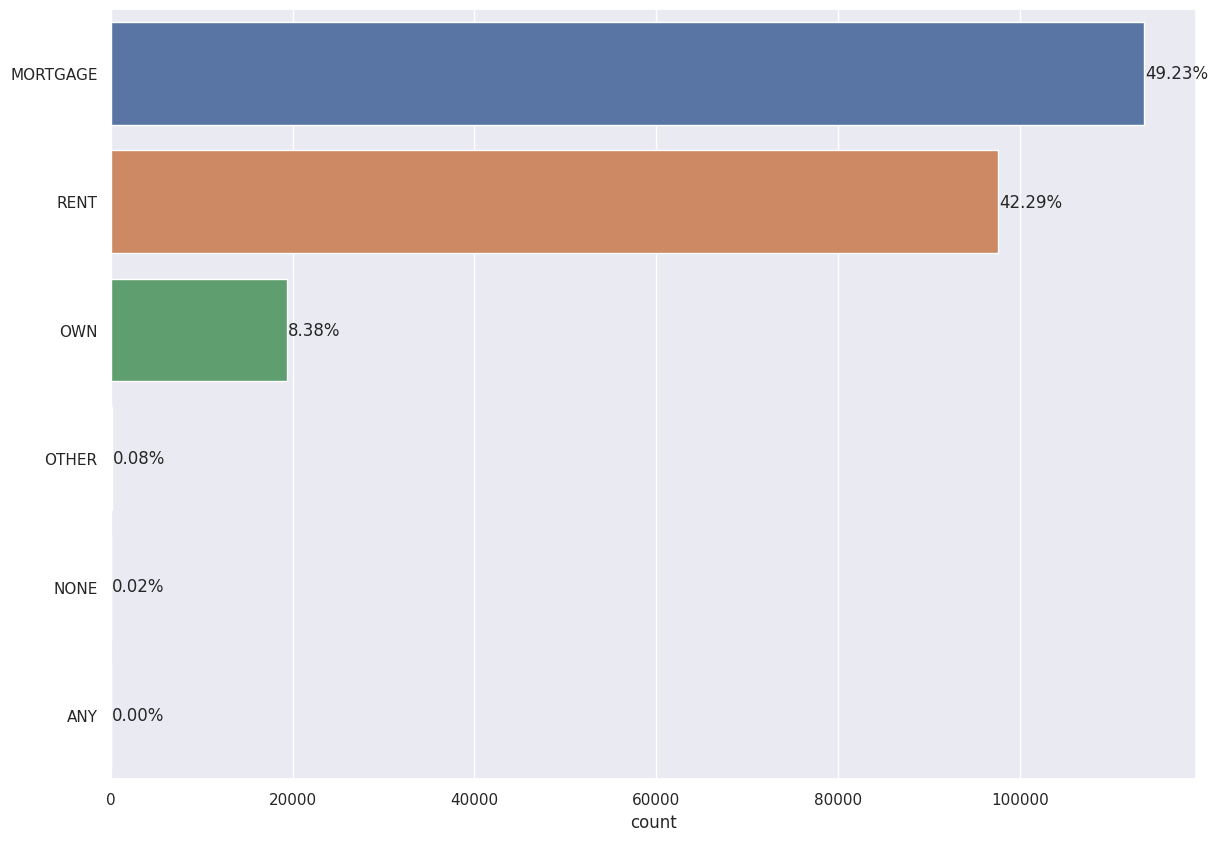

In [207]:
y = "home_ownership"
order = inter_df[y].sort_values().unique()
plot_count(df=inter_df, y=y, title="")

# **Prepocessing Data** 

In [208]:
# Hitung korelasi tiap variabel dengan loan status
correlations = (inter_df.select_dtypes(exclude=object)
                         .corr())
correlations["loan_status"].abs().sort_values(ascending=False)

loan_status                    1.000000
total_rec_prncp                0.460338
recoveries                     0.445422
last_pymnt_amnt                0.384781
total_pymnt_inv                0.358588
total_pymnt                    0.355349
collection_recovery_fee        0.300094
int_rate                       0.241059
total_rec_late_fee             0.152231
inq_last_6mths                 0.116393
dti                            0.107257
out_prncp                      0.099816
out_prncp_inv                  0.099814
revol_util                     0.089180
tot_cur_bal                    0.076230
mths_since_last_record         0.062190
annual_inc                     0.061623
total_rev_hi_lim               0.052931
loan_amnt                      0.049253
funded_amnt                    0.048790
funded_amnt_inv                0.039854
installment                    0.033419
total_rec_int                  0.032997
total_acc                      0.030680
mths_since_last_delinq         0.029299


In [209]:
# Menghapus kolom
def remove_column(dataframe, column_name):
    dataframe = dataframe.drop(column_name, axis=1)
    return dataframe

# Menghapus kolom dengan korelasi < 0.01
column_to_remove = ['Unnamed: 0','acc_now_delinq', 'pub_rec', 'collections_12_mths_ex_med', 'tot_coll_amt']
df = remove_column(inter_df, column_to_remove)

In [210]:
# Hitung korelasi tiap variabel dengan loan status
correlations = (df.select_dtypes(exclude=object)
                         .corr())
correlations["loan_status"].abs().sort_values(ascending=False)

loan_status                    1.000000
total_rec_prncp                0.460338
recoveries                     0.445422
last_pymnt_amnt                0.384781
total_pymnt_inv                0.358588
total_pymnt                    0.355349
collection_recovery_fee        0.300094
int_rate                       0.241059
total_rec_late_fee             0.152231
inq_last_6mths                 0.116393
dti                            0.107257
out_prncp                      0.099816
out_prncp_inv                  0.099814
revol_util                     0.089180
tot_cur_bal                    0.076230
mths_since_last_record         0.062190
annual_inc                     0.061623
total_rev_hi_lim               0.052931
loan_amnt                      0.049253
funded_amnt                    0.048790
funded_amnt_inv                0.039854
installment                    0.033419
total_rec_int                  0.032997
total_acc                      0.030680
mths_since_last_delinq         0.029299


## **Missing Values**

In [211]:
def display_missing_values(dataframe):
    missing_values = dataframe.isnull().sum()
    total_rows = dataframe.shape[0]
    missing_percentage = (missing_values / total_rows) * 100
    missing_data = pd.concat([missing_values, missing_percentage], axis=1, keys=['Missing Values', 'Missing Percentage'])
    missing_data = missing_data[missing_data['Missing Values'] > 0]
    print(missing_data)

display_missing_values(df)

                             Missing Values  Missing Percentage
emp_title                             12917            5.596742
emp_length                             8755            3.793410
annual_inc                                4            0.001733
desc                                 139933           60.630863
title                                    16            0.006933
delinq_2yrs                              29            0.012565
earliest_cr_line                         29            0.012565
inq_last_6mths                           29            0.012565
mths_since_last_delinq               129684           56.190125
mths_since_last_record               203149           88.021404
open_acc                                 29            0.012565
revol_util                              226            0.097922
total_acc                                29            0.012565
last_pymnt_d                            376            0.162915
next_pymnt_d                         227

In [212]:
column_to_remove = ['annual_inc_joint','dti_joint','verification_status_joint','open_acc_6m',
                    'open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il',
                    'il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','inq_fi','total_cu_tl',
                    'inq_last_12m','next_pymnt_d','mths_since_last_record','mths_since_last_major_derog',
                    'id','member_id','url','desc','mths_since_last_delinq','emp_title', 'title']

df1 = remove_column(df, column_to_remove)

In [213]:
display_missing_values(df1)

                    Missing Values  Missing Percentage
emp_length                    8755            3.793410
annual_inc                       4            0.001733
delinq_2yrs                     29            0.012565
earliest_cr_line                29            0.012565
inq_last_6mths                  29            0.012565
open_acc                        29            0.012565
revol_util                     226            0.097922
total_acc                       29            0.012565
last_pymnt_d                   376            0.162915
last_credit_pull_d              23            0.009966
tot_cur_bal                  66475           28.802617
total_rev_hi_lim             66475           28.802617


In [214]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230795 entries, 0 to 466283
Data columns (total 43 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                230795 non-null  int64  
 1   funded_amnt              230795 non-null  int64  
 2   funded_amnt_inv          230795 non-null  float64
 3   term                     230795 non-null  object 
 4   int_rate                 230795 non-null  float64
 5   installment              230795 non-null  float64
 6   grade                    230795 non-null  object 
 7   sub_grade                230795 non-null  object 
 8   emp_length               222040 non-null  object 
 9   home_ownership           230795 non-null  object 
 10  annual_inc               230791 non-null  float64
 11  verification_status      230795 non-null  object 
 12  issue_d                  230795 non-null  object 
 13  loan_status              230795 non-null  int64  
 14  pymnt_pla

In [215]:
# Menghapus kolom yang memiliki semua unique value
unique_columns = [col for col in inter_df.columns if inter_df[col].nunique() == 1]
df2 = remove_column(df1, unique_columns)

In [216]:
display_missing_values(df2)

                    Missing Values  Missing Percentage
emp_length                    8755            3.793410
annual_inc                       4            0.001733
delinq_2yrs                     29            0.012565
earliest_cr_line                29            0.012565
inq_last_6mths                  29            0.012565
open_acc                        29            0.012565
revol_util                     226            0.097922
total_acc                       29            0.012565
last_pymnt_d                   376            0.162915
last_credit_pull_d              23            0.009966
tot_cur_bal                  66475           28.802617
total_rev_hi_lim             66475           28.802617


In [217]:
unique_columns

['policy_code', 'application_type']

In [218]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230795 entries, 0 to 466283
Data columns (total 41 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                230795 non-null  int64  
 1   funded_amnt              230795 non-null  int64  
 2   funded_amnt_inv          230795 non-null  float64
 3   term                     230795 non-null  object 
 4   int_rate                 230795 non-null  float64
 5   installment              230795 non-null  float64
 6   grade                    230795 non-null  object 
 7   sub_grade                230795 non-null  object 
 8   emp_length               222040 non-null  object 
 9   home_ownership           230795 non-null  object 
 10  annual_inc               230791 non-null  float64
 11  verification_status      230795 non-null  object 
 12  issue_d                  230795 non-null  object 
 13  loan_status              230795 non-null  int64  
 14  pymnt_pla

In [219]:
display_missing_values(df2)

                    Missing Values  Missing Percentage
emp_length                    8755            3.793410
annual_inc                       4            0.001733
delinq_2yrs                     29            0.012565
earliest_cr_line                29            0.012565
inq_last_6mths                  29            0.012565
open_acc                        29            0.012565
revol_util                     226            0.097922
total_acc                       29            0.012565
last_pymnt_d                   376            0.162915
last_credit_pull_d              23            0.009966
tot_cur_bal                  66475           28.802617
total_rev_hi_lim             66475           28.802617


In [220]:
# Informasi rinci mengenai kolom dan baris data
data_stat = pd.DataFrame()
data_stat.index = df2.columns
data_stat["unique_value"] = df2.nunique()
data_stat["missing_rate"] = df2.isna().mean()
data_stat["dtype"] = df2.dtypes
data_stat

,unique_value,missing_rate,dtype
loan_amnt,1308,0.000000,int64
funded_amnt,1311,0.000000,int64
funded_amnt_inv,9552,0.000000,float64
term,2,0.000000,object
int_rate,505,0.000000,float64
installment,43071,0.000000,float64
grade,7,0.000000,object
sub_grade,35,0.000000,object
emp_length,11,0.037934,object
home_ownership,6,0.000000,object


## **Fitur Kategorikal**

In [221]:
# Kolom-kolom yang berdata kategorik
cat_features = df2.select_dtypes(include=object).columns
cat_features

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'zip_code',
       'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d'],
      dtype='object')

### **Kolom yang berisikan tanggal**

In [222]:
date_cols = ["issue_d", "earliest_cr_line", "last_pymnt_d", "last_credit_pull_d"]

for col in date_cols:
    print(df2[col].value_counts().iloc[:5])
    print()

issue_d
14-Oct    8808
14-Jul    8614
14-Apr    6744
13-Nov    6665
13-Oct    6653
Name: count, dtype: int64

earliest_cr_line
Oct-00    1972
Oct-99    1837
Nov-00    1796
1-Oct     1779
Aug-00    1758
Name: count, dtype: int64

last_pymnt_d
15-Jul    11703
15-Mar    10087
15-Jun    10078
15-Apr    10051
15-Aug     9932
Name: count, dtype: int64

last_credit_pull_d
16-Jan    93758
15-Dec    13753
15-Nov     8199
15-Sep     7942
15-Oct     7805
Name: count, dtype: int64



Tidak terdapat korelasi yang kuat antar tanggal serta tiap tanggal memiliki sedikit korelasi dengan status pinjaman. Namun kita akan menghapus fitur tanggal yang berkorelasi kurang dari 0.1 dengan status pinjaman

/opt/conda/lib/python3.10/site-packages/dython/nominal.py:736: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
/opt/conda/lib/python3.10/site-packages/dython/nominal.py:737: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)
/opt/conda/lib/python3.10/site-packages/dython/nominal.py:736: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]]

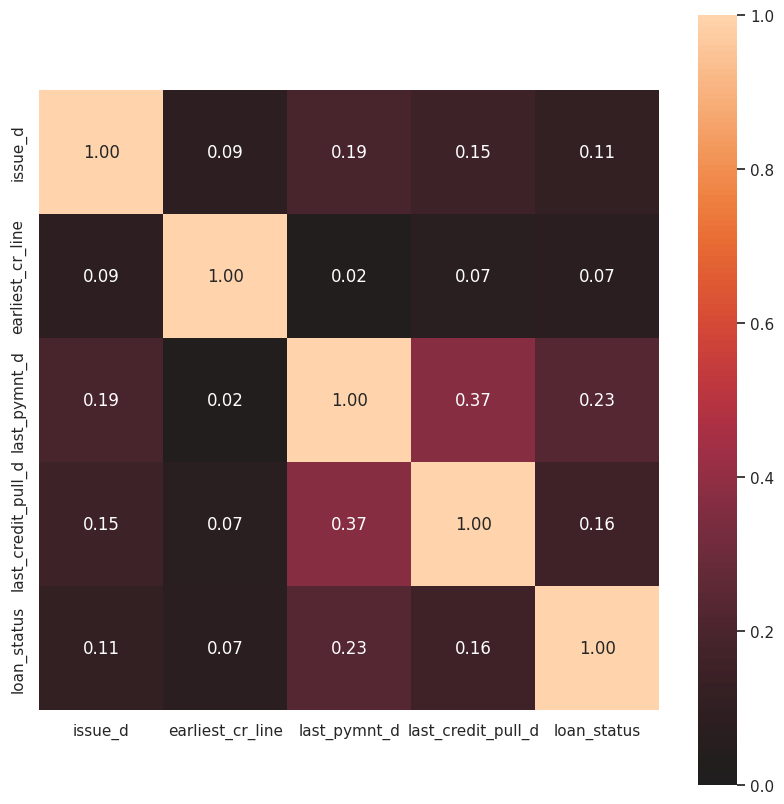

In [223]:
# Korelasi antar tanggal dan status pinjaman
used_cols = date_cols + ["loan_status"]
complete_correlation = associations(
    df2[used_cols],
    filename='date_correlation.png',
    figsize=(10,10)
)

In [224]:
# Fitur tanggal yang akan kita gunakan
affect_date_cols = ["issue_d", "last_pymnt_d", "last_credit_pull_d"]
affect_date_cols

['issue_d', 'last_pymnt_d', 'last_credit_pull_d']

In [225]:
# Hapus fitur tanggal yang tidak memiliki korelasi kuat dengan status pinjaman
unused_cols = ["earliest_cr_line"]
pre_df = df2.drop(columns=unused_cols, errors="ignore")
pre_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,5000.00,861.07,0.00,0.00,0.00,15-Jan,171.62,16-Jan,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,456.46,435.17,0.00,117.08,1.11,13-Apr,119.66,13-Sep,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,2400.00,603.65,0.00,0.00,0.00,14-Jun,649.91,16-Jan,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,10000.00,2209.33,16.97,0.00,0.00,15-Jan,357.48,15-Jan,NaN,NaN
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,5000.00,631.38,0.00,0.00,0.00,15-Jan,161.03,15-Sep,NaN,NaN


### **Kolom Kategorik yang Tidak Terpakai**

In [226]:
other_cat_cols = cat_features[~cat_features.isin(date_cols)]
other_cat_cols

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'pymnt_plan', 'purpose', 'zip_code',
       'addr_state', 'initial_list_status'],
      dtype='object')

In [227]:
pre_df.loc[:, other_cat_cols].head()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,zip_code,addr_state,initial_list_status
0,36 months,B,B2,10+ years,RENT,Verified,n,credit_card,860xx,AZ,f
1,60 months,C,C4,< 1 year,RENT,Source Verified,n,car,309xx,GA,f
2,36 months,C,C5,10+ years,RENT,Not Verified,n,small_business,606xx,IL,f
3,36 months,C,C1,10+ years,RENT,Source Verified,n,other,917xx,CA,f
5,36 months,A,A4,3 years,RENT,Source Verified,n,wedding,852xx,AZ,f


Beberapa kolom kategorikal yang tidak terpakai adalah:
- zip_code karena 3 angka dibelakangnya disensor
- sub_grade karena sudah memiliki kolom yang mirip yaitu grade

In [228]:
unused_cols = ["zip_code", "sub_grade"]
pre_df = pre_df.drop(columns=unused_cols, errors="ignore")
pre_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,...,5000.00,861.07,0.00,0.00,0.00,15-Jan,171.62,16-Jan,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,...,456.46,435.17,0.00,117.08,1.11,13-Apr,119.66,13-Sep,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,...,2400.00,603.65,0.00,0.00,0.00,14-Jun,649.91,16-Jan,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,...,10000.00,2209.33,16.97,0.00,0.00,15-Jan,357.48,15-Jan,NaN,NaN
5,5000,5000,5000.0,36 months,7.90,156.46,A,3 years,RENT,36000.0,...,5000.00,631.38,0.00,0.00,0.00,15-Jan,161.03,15-Sep,NaN,NaN


In [229]:
# Hitung korelasi tiap variabel dengan loan status
correlations = (pre_df.select_dtypes(exclude=object)
                         .corr())
correlations["loan_status"].abs().sort_values(ascending=False)

loan_status                1.000000
total_rec_prncp            0.460338
recoveries                 0.445422
last_pymnt_amnt            0.384781
total_pymnt_inv            0.358588
total_pymnt                0.355349
collection_recovery_fee    0.300094
int_rate                   0.241059
total_rec_late_fee         0.152231
inq_last_6mths             0.116393
dti                        0.107257
out_prncp                  0.099816
out_prncp_inv              0.099814
revol_util                 0.089180
tot_cur_bal                0.076230
annual_inc                 0.061623
total_rev_hi_lim           0.052931
loan_amnt                  0.049253
funded_amnt                0.048790
funded_amnt_inv            0.039854
installment                0.033419
total_rec_int              0.032997
total_acc                  0.030680
delinq_2yrs                0.019631
open_acc                   0.013934
revol_bal                  0.011371
Name: loan_status, dtype: float64

In [230]:
other_cat_cols = cat_features[~cat_features.isin(date_cols + unused_cols)]
other_cat_cols

Index(['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'pymnt_plan', 'purpose', 'addr_state', 'initial_list_status'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/dython/nominal.py:736: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
/opt/conda/lib/python3.10/site-packages/dython/nominal.py:737: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)
/opt/conda/lib/python3.10/site-packages/dython/nominal.py:736: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]]

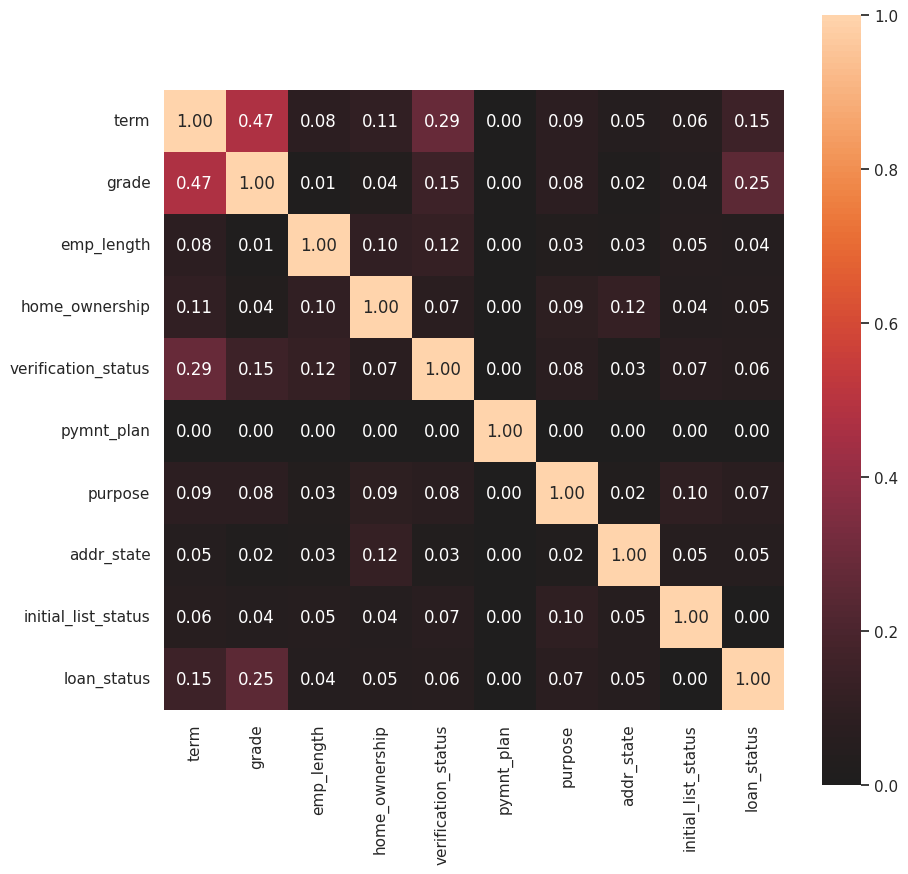

In [231]:
# Korelasi antar fitur kategorikal dan status pinjaman
used_cols = other_cat_cols.to_list() + ["loan_status"]
complete_correlation = associations(
    pre_df[used_cols],
    filename='cat_correlation.png',
    figsize=(10,10)
)

Fitur grade dan term memiliki sedikit korelasi dengan status pinjaman.

In [232]:
# Fitur kategorikal yang akan kita gunakan
affect_cat_cols = ["grade", "term"]
affect_cat_cols

['grade', 'term']

In [233]:
# Hapus fitur yang kurang berpengaruh
used_cols = ["grade", "term"]
unused_cols = other_cat_cols[~other_cat_cols.isin(used_cols)]
pre_df = pre_df.drop(columns=unused_cols, errors="ignore")
pre_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,annual_inc,issue_d,loan_status,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,24000.0,11-Dec,1,...,5000.00,861.07,0.00,0.00,0.00,15-Jan,171.62,16-Jan,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,30000.0,11-Dec,0,...,456.46,435.17,0.00,117.08,1.11,13-Apr,119.66,13-Sep,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,12252.0,11-Dec,1,...,2400.00,603.65,0.00,0.00,0.00,14-Jun,649.91,16-Jan,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,49200.0,11-Dec,1,...,10000.00,2209.33,16.97,0.00,0.00,15-Jan,357.48,15-Jan,NaN,NaN
5,5000,5000,5000.0,36 months,7.90,156.46,A,36000.0,11-Dec,1,...,5000.00,631.38,0.00,0.00,0.00,15-Jan,161.03,15-Sep,NaN,NaN


In [234]:
# Daftar kolom yang ingin diisi dengan nilai modus
kolom = ['annual_inc','delinq_2yrs',
         'inq_last_6mths','open_acc','revol_util',
         'total_acc','last_pymnt_d','last_credit_pull_d',
         'tot_cur_bal','total_rev_hi_lim']

# Iterasi melalui setiap kolom
for col in kolom:
    # Hitung modus
    modus = pre_df[col].mode()[0]
    # Mengisi nilai yang hilang dengan modus
    pre_df[col].fillna(modus, inplace=True)

/tmp/ipykernel_34/64743886.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pre_df[col].fillna(modus, inplace=True)


In [235]:
pre_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230795 entries, 0 to 466283
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                230795 non-null  int64  
 1   funded_amnt              230795 non-null  int64  
 2   funded_amnt_inv          230795 non-null  float64
 3   term                     230795 non-null  object 
 4   int_rate                 230795 non-null  float64
 5   installment              230795 non-null  float64
 6   grade                    230795 non-null  object 
 7   annual_inc               230795 non-null  float64
 8   issue_d                  230795 non-null  object 
 9   loan_status              230795 non-null  int64  
 10  dti                      230795 non-null  float64
 11  delinq_2yrs              230795 non-null  float64
 12  inq_last_6mths           230795 non-null  float64
 13  open_acc                 230795 non-null  float64
 14  revol_bal

Setelah dilakukan beberapa proses akhirnya diperoleh bahwa untuk kolom yang digunakan untuk ke tahap permodelan hanya 31 kolom dari 75 kolom. Kolom-kolom tersebut dianggap berpengaruh dan paling baik digunakan untuk memprediksi status peminjaman.

# **Permodelan**

### **Tentukan Label dan Fitur Data**
Label menunjukkan tingkat performa pinjaman yang ditampilkan dalam kolom `loan_status`. Karena kolom tersebut memiliki beberapa kategori, saya telah memilih dan menggabungkannya menjadi dua kategori, yaitu `baik` dan `buruk`.

Sebelumnya, kita perlu memisahkan label dan fitur dari data untuk kemudian dapat dilakukan pemisahan data.

In [236]:
label = pre_df["loan_status"].copy()
features = pre_df.drop("loan_status", axis=1).copy()

label = pre_df["loan_status"].copy()
features = pre_df.drop("loan_status", axis=1).copy()

print("Label shape:")
print(label.shape)

print("Features shape:")
print(features.shape)

Label shape:
(230795,)
Features shape:
(230795, 30)


### **Praproses**

In [237]:
num_features = features.select_dtypes(exclude="object")
cat_features = features.select_dtypes(include="object")

In [238]:
# Normalisasi fitur numerik
num_features = (num_features - num_features.mean()) / num_features.std()
num_features

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim
0,-1.045905,-1.043424,-1.025130,-0.716859,-1.036168,-0.866103,1.472931,-0.335794,0.078612,-1.626662,...,-0.812658,-0.800159,-0.765957,-0.578913,-0.139146,-0.222400,-0.149837,-0.822146,-0.690145,-0.444179
1,-1.356735,-1.355255,-1.332374,0.340654,-1.459377,-0.757850,-2.000498,-0.335794,3.480063,-1.626662,...,-1.326547,-1.310168,-1.320543,-0.780184,-0.139146,-0.071386,-0.140651,-0.829680,-0.690145,-0.444179
2,-1.369168,-1.367728,-1.344788,0.498595,-1.358750,-1.078064,-0.994312,-0.335794,0.928975,-1.834472,...,-1.115272,-1.099216,-1.083314,-0.700564,-0.139146,-0.222400,-0.149837,-0.752787,-0.690145,-0.444179
3,-0.424244,-0.419761,-0.401331,-0.066786,-0.311488,-0.411438,0.475868,-0.335794,0.078612,-0.171993,...,-0.138548,-0.123979,-0.155655,0.058247,2.788316,-0.222400,-0.149837,-0.795193,-0.690145,-0.444179
5,-1.045905,-1.043424,-1.022026,-1.346331,-1.062495,-0.649596,-0.671081,-0.335794,1.779338,-0.379803,...,-0.836983,-0.821350,-0.765957,-0.687459,-0.139146,-0.222400,-0.149837,-0.823681,-0.690145,-0.444179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,-0.607634,-0.603742,-0.584436,1.022774,-0.811174,-0.621883,-0.530319,5.185496,-0.771750,0.243626,...,-1.218395,-1.202181,-1.332307,-0.744608,-0.139146,1.273040,-0.053887,-0.815471,0.136344,0.995379
466277,0.570412,0.578098,0.588679,-1.346331,0.608204,0.324687,-0.784472,1.044529,-0.771750,1.074865,...,-0.836953,-0.822146,-0.817113,-0.489260,-0.139146,-0.222400,-0.149837,-0.765357,-0.389262,1.015207
466278,-0.424244,-0.419761,-0.401331,1.022774,-0.215091,-0.541342,-0.622857,-0.335794,-0.771750,-0.379803,...,-0.120771,-0.106227,-0.155655,0.145598,-0.139146,-0.222400,-0.149837,-0.049229,-0.618301,-0.539356
466281,1.067741,1.077028,1.088339,1.416480,0.687350,0.108180,0.273848,-0.335794,3.480063,1.490485,...,-0.937959,-0.922172,-1.152029,0.356704,-0.139146,-0.222400,-0.149837,-0.844495,0.876931,0.582943


In [239]:
# OneHotEncode fitur kategorik
cat_features = pd.get_dummies(cat_features)
cat_features

,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,issue_d_10-Apr,...,last_credit_pull_d_9-Dec,last_credit_pull_d_9-Feb,last_credit_pull_d_9-Jan,last_credit_pull_d_9-Jul,last_credit_pull_d_9-Jun,last_credit_pull_d_9-Mar,last_credit_pull_d_9-May,last_credit_pull_d_9-Nov,last_credit_pull_d_9-Oct,last_credit_pull_d_9-Sep
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
466277,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
466278,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
466281,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [240]:
# Gabungkan Fitur
features_full = pd.concat([num_features, cat_features], axis=1)

In [241]:
features_full.shape

(230795, 326)

### **Memisahkan Data**

In [242]:
X_train, X_test, y_train, y_test = train_test_split(features_full, label, test_size=0.2, random_state=42, stratify=label)

In [243]:
X_train.shape, y_train.shape

((184636, 326), (184636,))

# **Model XGBClassifier**

In [244]:
from xgboost import XGBClassifier

# Membuat objek model XGBoost Classifier
xgboost = XGBClassifier()

# Melatih model menggunakan fitur dan label
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [245]:
# Menggunakan model untuk melakukan prediksi
predictions = xgboost.predict(X_train)

## **Menyimpan Model**

In [246]:
import h5py
import joblib
# Simpan objek dalam format H5 menggunakan joblib
joblib.dump(xgboost, "xgboost.h5")

['xgboost.h5']

## **Evaluasi Model**

### **Metrik Klasifikasi**

### Train

In [249]:
xgboost.score(X_train, y_train)

0.9989438679347473

In [250]:
report = classification_report(y_true=y_train, y_pred=xgboost.predict(X_train))
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36845
           1       1.00      1.00      1.00    147791

    accuracy                           1.00    184636
   macro avg       1.00      1.00      1.00    184636
weighted avg       1.00      1.00      1.00    184636



### Test

In [251]:
xgboost.score(X_test, y_test)

0.9961870924413441

In [252]:
report = classification_report(y_true=y_test, y_pred=xgboost.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9211
           1       1.00      1.00      1.00     36948

    accuracy                           1.00     46159
   macro avg       1.00      0.99      0.99     46159
weighted avg       1.00      1.00      1.00     46159



Hasil akurasi pada data test dan data train cenderung sama yaitu 0.996 dan 0.999 artinya model tidak mengalami overfitting. Sehingga model bisa digunakan dengan baik karena mencapai 99% pada akurasinya.

### Confusion Matrix

In [253]:
conf = confusion_matrix(y_true=y_test, y_pred=xgboost.predict(X_test))

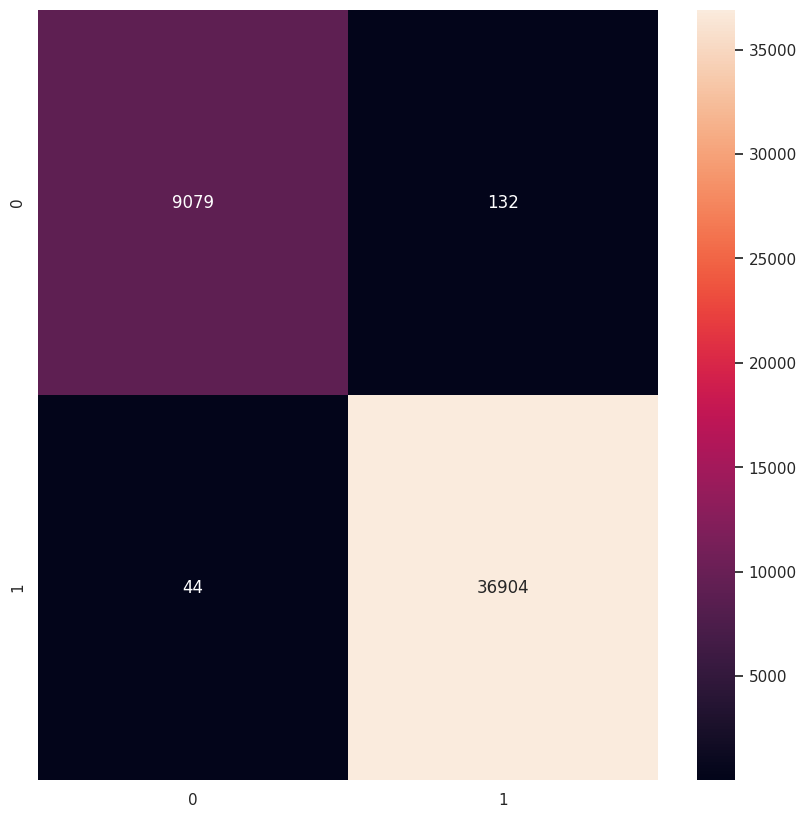

In [254]:
plt.figure(figsize=(10, 10))
sns.heatmap(conf, annot=True, fmt="g")
plt.show()

Dapat dilihat dari matriks akurasi yang diperoleh bahwa sebanyak 9088 peminjam terprediksi dengan benar yaitu status ditolak, sedangkan sebanyak 123 peminjam lainnya terprediksi salah yaitu dengan status diterima.


Selanjutnya sebanyak 36907 peminjam terprediksi benar dengan status diterima, sedangkan 41 peminjam lainnya terprediksi salah yaitu dengan status ditolak.

# **Model Random Forest Classifier**

In [255]:
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model XGBoost Classifier
rf = RandomForestClassifier()

# Melatih model menggunakan fitur dan label
rf.fit(X_train, y_train)

RandomForestClassifier()

In [256]:
# Menggunakan model untuk melakukan prediksi
predictions = rf.predict(X_train)

## **Menyimpan Model**

In [257]:
import h5py
import joblib
# Simpan objek dalam format H5 menggunakan joblib
joblib.dump(rf, "rf.h5")

['rf.h5']

### **Metrik Klasifikasi**

### Train

In [258]:
rf.score(X_train, y_train)

1.0

In [259]:
report = classification_report(y_true=y_train, y_pred=rf.predict(X_train))
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36845
           1       1.00      1.00      1.00    147791

    accuracy                           1.00    184636
   macro avg       1.00      1.00      1.00    184636
weighted avg       1.00      1.00      1.00    184636



### Test

In [260]:
rf.score(X_test, y_test)

0.9934140687623215

In [261]:
report = classification_report(y_true=y_test, y_pred=rf.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      9211
           1       0.99      1.00      1.00     36948

    accuracy                           0.99     46159
   macro avg       1.00      0.98      0.99     46159
weighted avg       0.99      0.99      0.99     46159



Hasil akurasi pada data test dan data train cenderung sama yaitu 0.991 dan 1 artinya model tidak mengalami overfithing. Sehingga model bisa digunakan dengan baik karena mencapai 99% pada akurasinya.

### Confusion Matrix

In [262]:
conf = confusion_matrix(y_true=y_test, y_pred=rf.predict(X_test))

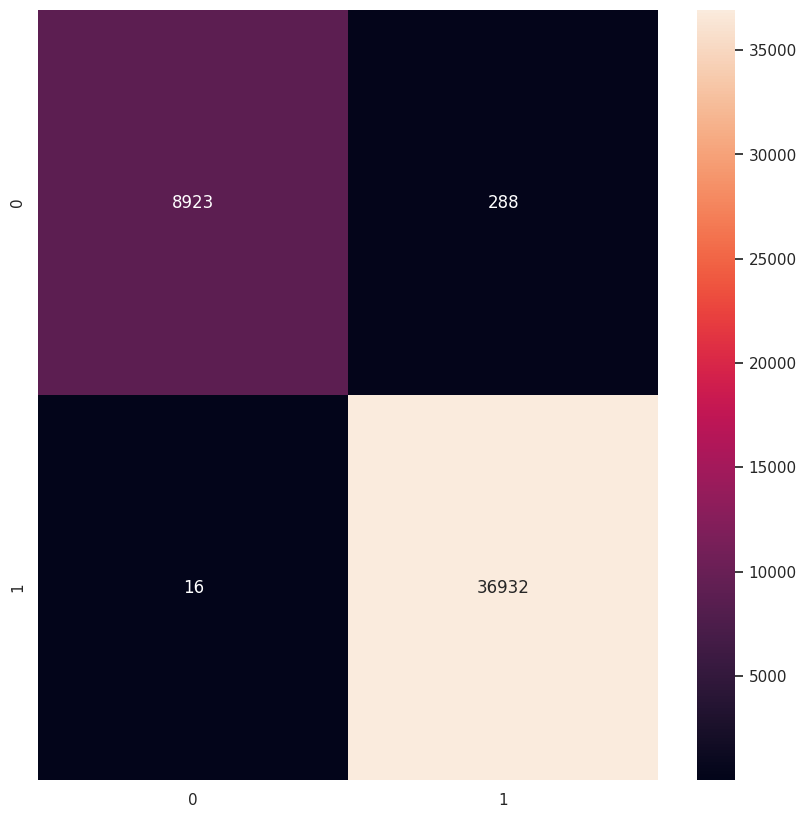

In [263]:
plt.figure(figsize=(10, 10))
sns.heatmap(conf, annot=True, fmt="g")
plt.show()

# **Kesimpulan**

*  Dari kedua model yang digunakan yaitu xgboost dan random forest dapat disimpulkan bahwa kedua model tersebut sangat baik. Namun jika dibandingkan berdasarkan akurasi data test, Xgboost memiliki hasil yang lebih baik dimana kesalahan dalam memprediksi lebih kecil sehingga dalam proses penerimaan atau penolakan peminjaman dapat lebih meminimalkan resiko yang ada pada perusahaan.